<a href="https://colab.research.google.com/github/Kang-Inprogress/AI-System/blob/Final-Test/%EC%A7%84%EC%A7%9C_%EA%B8%B0%EB%A7%90%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TPU 연결과 초기화
import os
import tensorflow as tf
 

TPU_PATH = f"grpc://{os.environ['COLAB_TPU_ADDR']}"

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu=TPU_PATH)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

# TPU 연결을 위한 Strategy설정
strategy = tf.distribute.experimental.TPUStrategy(resolver)

# 데이터

In [29]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import tensorflow as tf

dataset = load_wine()

data = dataset["data"]
target = dataset["target"]

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, shuffle = True)
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)


print(x_train.shape, y_train.shape)
print(x_train[0])

(142, 13) (142, 3)
[1.285e+01 1.600e+00 2.520e+00 1.780e+01 9.500e+01 2.480e+00 2.370e+00
 2.600e-01 1.460e+00 3.930e+00 1.090e+00 3.630e+00 1.015e+03]


# MLP

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

node_input = 13
node_hidden = 128
node_output = 3

mlp = Sequential()
mlp.add(Dense(units = node_hidden, activation="tanh", input_shape = (node_input, ), kernel_initializer="random_uniform", bias_initializer="zeros"))
mlp.add(Dense(units = node_output, activation="tanh", kernel_initializer="random_uniform", bias_initializer="zeros"))
mlp.compile(loss="mse", optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

hist = mlp.fit(x_train, y_train, batch_size = 4, epochs = 50, validation_data = (x_test, y_test), verbose = 0)
res = mlp.evaluate(x_test, y_test, verbose = 0)
print("Accuracy: ", res[1] * 100)

Accuracy:  91.66666865348816


In [76]:
learningrate_ary = [0.001, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002]
epoch_ary = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

def create_model():
  mlp = Sequential()
  mlp.add(Dense(units = node_hidden, activation="tanh", input_shape = (node_input, ), kernel_initializer="random_uniform", bias_initializer="zeros"))
  mlp.add(Dense(units = node_output, activation="tanh", kernel_initializer="random_uniform", bias_initializer="zeros"))
  return mlp

with strategy.scope():
  mlp = create_model()
  for LR in learningrate_ary:
    for E in epoch_ary:
      mlp.compile(loss="mse", optimizer = Adam(learning_rate = LR), metrics = ["accuracy"])
      hist = mlp.fit(x_train, y_train, batch_size = 4, epochs = E, validation_data = (x_test, y_test), verbose = 0)
      res = mlp.evaluate(x_test, y_test, verbose = 0)
      print("[ LR:", LR, ", E:", E, "] Accuracy: ", res[1] * 100)

[ LR: 0.001 , E: 10 ] Accuracy:  63.88888955116272
[ LR: 0.001 , E: 20 ] Accuracy:  88.88888955116272
[ LR: 0.001 , E: 30 ] Accuracy:  91.66666865348816
[ LR: 0.001 , E: 40 ] Accuracy:  91.66666865348816
[ LR: 0.001 , E: 50 ] Accuracy:  94.4444477558136
[ LR: 0.001 , E: 60 ] Accuracy:  97.22222089767456
[ LR: 0.001 , E: 70 ] Accuracy:  97.22222089767456
[ LR: 0.001 , E: 80 ] Accuracy:  91.66666865348816
[ LR: 0.001 , E: 90 ] Accuracy:  88.88888955116272
[ LR: 0.001 , E: 100 ] Accuracy:  91.66666865348816
[ LR: 0.0012 , E: 10 ] Accuracy:  94.4444477558136
[ LR: 0.0012 , E: 20 ] Accuracy:  88.88888955116272
[ LR: 0.0012 , E: 30 ] Accuracy:  88.88888955116272
[ LR: 0.0012 , E: 40 ] Accuracy:  94.4444477558136
[ LR: 0.0012 , E: 50 ] Accuracy:  88.88888955116272
[ LR: 0.0012 , E: 60 ] Accuracy:  88.88888955116272
[ LR: 0.0012 , E: 70 ] Accuracy:  94.4444477558136
[ LR: 0.0012 , E: 80 ] Accuracy:  91.66666865348816
[ LR: 0.0012 , E: 90 ] Accuracy:  94.4444477558136
[ LR: 0.0012 , E: 100 ] Ac

# DEEP MLP

In [80]:
learningrate_ary = [0.001, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002]
epoch_ary = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

node_input = 13
node_hidden1 = 128
node_hidden2 = 64
node_hidden3 = 64
node_hidden4 = 64
node_output = 3

def create_model():
  mlp = Sequential()
  mlp.add(Dense(units = node_hidden1, activation="tanh", input_shape = (node_input, ), kernel_initializer="random_uniform", bias_initializer="zeros"))
  mlp.add(Dense(units = node_hidden2, activation="tanh", kernel_initializer="random_uniform", bias_initializer="zeros"))
  mlp.add(Dense(units = node_hidden3, activation="tanh", kernel_initializer="random_uniform", bias_initializer="zeros"))
  mlp.add(Dense(units = node_hidden4, activation="tanh", kernel_initializer="random_uniform", bias_initializer="zeros"))
  mlp.add(Dense(units = node_output, activation="tanh", kernel_initializer="random_uniform", bias_initializer="zeros"))
  return mlp

with strategy.scope():
  mlp = create_model()
  for LR in learningrate_ary:
    for E in epoch_ary:
      mlp.compile(loss="mse", optimizer = Adam(learning_rate = LR), metrics = ["accuracy"])
      hist = mlp.fit(x_train, y_train, batch_size = 4, epochs = E, validation_data = (x_test, y_test), verbose = 0)
      res = mlp.evaluate(x_test, y_test, verbose = 0)
      print("[ LR:", LR, ", E:", E, "] Accuracy: ", res[1] * 100)

[ LR: 0.001 , E: 10 ] Accuracy:  63.88888955116272
[ LR: 0.001 , E: 20 ] Accuracy:  63.88888955116272
[ LR: 0.001 , E: 30 ] Accuracy:  72.22222089767456
[ LR: 0.001 , E: 40 ] Accuracy:  75.0
[ LR: 0.001 , E: 50 ] Accuracy:  91.66666865348816
[ LR: 0.001 , E: 60 ] Accuracy:  91.66666865348816
[ LR: 0.001 , E: 70 ] Accuracy:  88.88888955116272
[ LR: 0.001 , E: 80 ] Accuracy:  91.66666865348816
[ LR: 0.001 , E: 90 ] Accuracy:  63.88888955116272
[ LR: 0.001 , E: 100 ] Accuracy:  80.55555820465088
[ LR: 0.0012 , E: 10 ] Accuracy:  69.4444477558136
[ LR: 0.0012 , E: 20 ] Accuracy:  94.4444477558136
[ LR: 0.0012 , E: 30 ] Accuracy:  77.77777910232544
[ LR: 0.0012 , E: 40 ] Accuracy:  91.66666865348816
[ LR: 0.0012 , E: 50 ] Accuracy:  94.4444477558136
[ LR: 0.0012 , E: 60 ] Accuracy:  69.4444477558136
[ LR: 0.0012 , E: 70 ] Accuracy:  69.4444477558136
[ LR: 0.0012 , E: 80 ] Accuracy:  38.88888955116272
[ LR: 0.0012 , E: 90 ] Accuracy:  38.88888955116272
[ LR: 0.0012 , E: 100 ] Accuracy:  38.8

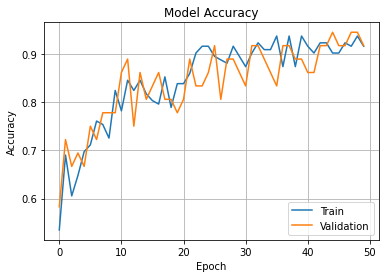

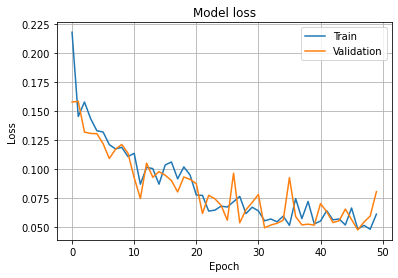

In [38]:
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "lower right")
plt.grid()
plt.show()

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper right")
plt.grid()
plt.show()